In [1]:
#Importing required libraries
import pandas as pd

In [2]:
#Read data
#from google.colab import drive
data = pd.read_csv('/content/pride_community_acceptance.csv')
data

,Datetime,Tweet Id,RawContent,Rendered Content,Text,Username,Hashtags,Source,Retweet Count,Reply Count,View Count,Like Count,Language,Media,UserLocation,SourceLabel
0,2023-03-25 23:59:22+00:00,1639779036569239553,@CaniacDaBackup Any details of the support you...,@CaniacDaBackup Any details of the support you...,@CaniacDaBackup Any details of the support you...,Jdmathison1,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,1,103.0,0,en,NaN,NaN,Twitter for iPhone
1,2023-03-25 23:57:37+00:00,1639778593705455618,It baffles the mind that people think that pri...,It baffles the mind that people think that pri...,It baffles the mind that people think that pri...,jntrnr,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,2259.0,17,en,NaN,NaN,Twitter Web App
2,2023-03-25 23:56:03+00:00,1639778200132648962,@JustMy_Comment2 @DrifterKybe @GeorgeTakei Nob...,@JustMy_Comment2 @DrifterKybe @GeorgeTakei Nob...,@JustMy_Comment2 @DrifterKybe @GeorgeTakei Nob...,TrombonafideTA,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,13.0,0,en,NaN,NaN,Twitter for iPhone
3,2023-03-25 23:55:26+00:00,1639778045484736512,Pride of the community.,Pride of the community.,Pride of the community.,OmerHejazeen,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,12.0,0,en,NaN,NaN,Twitter for iPhone
4,2023-03-25 23:46:58+00:00,1639775913750720514,@Charles35093463 Exactly! Don’t vote for DeSan...,@Charles35093463 Exactly! Don’t vote for DeSan...,@Charles35093463 Exactly! Don’t vote for DeSan...,Momma822,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,27.0,1,en,NaN,NaN,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,2023-03-10 08:01:28+00:00,1634102154351788032,The purpose of the Auslan Day competition is t...,The purpose of the Auslan Day competition is t...,The purpose of the Auslan Day competition is t...,deafaustralia,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",0,0,41.0,1,en,NaN,NaN,Buffer
4997,2023-03-10 08:00:49+00:00,1634101991172349953,Now that was a fun activation fun Solutions Gr...,Now that was a fun activation fun Solutions Gr...,Now that was a fun activation fun Solutions Gr...,Bespoke_Styling,"['SolutionsGroupEvents', 'Pride2023', 'Capetown']","<a href=""https://www.loomly.com/"" rel=""nofollo...",0,0,20.0,0,en,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,Loomly
4998,2023-03-10 07:37:52+00:00,1634096217532637184,There is a sense of pride of cleaning a once f...,There is a sense of pride of cleaning a once f...,There is a sense of pride of cleaning a once f...,renegadestyle,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,176.0,1,en,NaN,NaN,Twitter for iPhone
4999,2023-03-10 07:35:11+00:00,1634095540014030848,#Portrait of a woman belonging to the #Mong mi...,#Portrait of a woman belonging to the #Mong mi...,#Portrait of a woman belonging to the #Mong mi...,HowWeTravelled,"['Portrait', 'Mong', 'Vietnam', 'travelphotogr...","<a href=""http://twitter.com/download/android"" ...",0,0,100.0,2,en,[Photo(previewUrl='https://pbs.twimg.com/media...,"Place(id='ea0a61fa0c646676', fullName='Rotterd...",Twitter for Android


# **Data Cleaning**

In [3]:
import nltk
import string, re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')

nltk.download('words')
words = set(nltk.corpus.words.words())

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('[\'"]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    hiragana = re.compile('[\u3040-\u309F]')
    katakana = re.compile('[\u30A0-\u30FF]')
    CJK = re.compile('[\u4300-\u9faf]')
    text = text.replace("'", "").replace('"', '').replace(","," ")
    text = text.replace("`", "").replace('``', '')
    text = text.replace("’", "").replace('“', '').replace('”', '')

    text = hiragana.sub('', text)
    text = katakana.sub('', text)
    text = CJK.sub('', text)

    text = " ".join(word for word in nltk.wordpunct_tokenize(text) if word.lower() in words or not word.isalpha())
    
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])
        
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    
    
    return text

data['Text'] = data['Text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [4]:
#Removing Emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data['Text']=data['Text'].apply(lambda x: remove_emoji(x))

# **Emotion Analysis**

In [5]:
#Read AFINN-en-165.txt file
afinn = pd.read_csv('/content/AFINN.txt', sep='\t', header=None, names=['word', 'emotion'])
afinn

,word,emotion
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
3377,yucky,-2
3378,yummy,3
3379,zealot,-2
3380,zealots,-2


In [6]:
#Import the required libraries

#SentimentIntensityAnalyzer to detect sarcasm
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [7]:
from textblob.en import sentiments
# Create a sentiment analyzer object
sarcasm_analyzer = SentimentIntensityAnalyzer()

# Create a dictionary that maps words to emotions
emotion_words_dict = dict(zip(afinn.word, afinn.emotion))

# Define a function that computes the emotion score for a sentence
def calculate_emotion(tweets):
    #Create a new dataframe
    emotion_dataframe = pd.DataFrame(columns=['text','subjectivity','polarity','sentiments','emotion_score', 'emotion', 'sarcasm'])

    for i in tweets :
      #----------- Start : Emotion Detection -----------------
      # Split the sentence into words
      words = i.split()

      # Compute the total emotion score for the sentence
      emotion_score = sum(emotion_words_dict.get(word, 0) for word in words)

      # Classify the emotion as positive, negative, or neutral based on the emotion score
      if emotion_score > 0:
        emotion =  'positive'
      elif emotion_score < 0:
        emotion =  'negative'
      else:
        emotion = 'neutral'

      #---------- End : Emotion Detection -----------------

       #----------- Start : Sentiments Detection -----------------
      blob = TextBlob(i)
      pol = blob.sentiment.polarity


      # Classify the emotion as positive, negative, or neutral based on the emotion score
      if pol > 0:
        sentiments =  'positive'
      elif pol < 0:
        sentiments =  'negative'
      else:
        sentiments = 'neutral'

      #---------- End : Sentiments Detection -----------------

      #---------- Start : Subjectivity Calculation ---------
      #Calculate subjectivity
      text_subjectivity = blob.sentiment.subjectivity

      #---------- End : Subjectivity Calculation -------------

      #---------- Start : Sarcasm Detection -------------

      #Analyze the sentiments of a tweet
      scores = sarcasm_analyzer.polarity_scores(i)

      #Check if the sentiment is negative and the compound score is low
      if scores['neg'] > scores['pos'] and scores['compound'] < -0.5:
        sarcasm = 'True'
      else:
        sarcasm = 'False'

      #---------- End : Sarcasm Detection ----------------

      #Create row for dataframe
      row = [i, text_subjectivity,pol,sentiments, emotion_score, emotion, sarcasm]

      #Add row to dataframe
      emotion_dataframe.loc[len(emotion_dataframe)] = row 

    return emotion_dataframe

In [8]:
#Call the function 
sentiments_dataframe = calculate_emotion(data['Text'])


# **Sentiments Visualisation**

# Emotion Score vs Subjectivity

In [9]:
import seaborn as sns

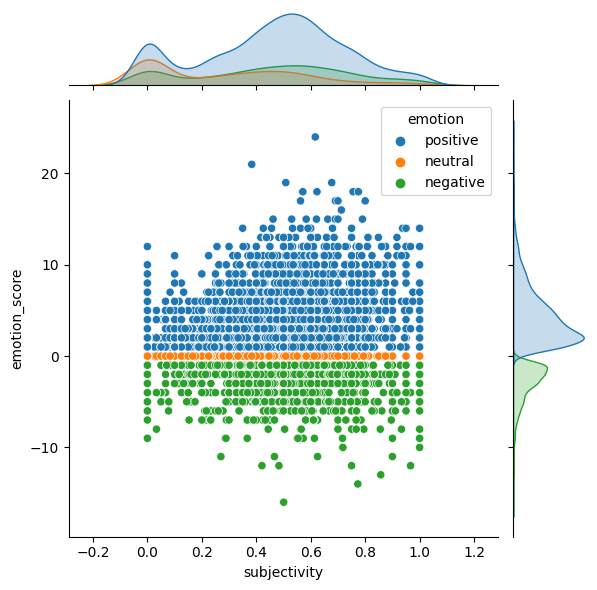

In [10]:
#Plot subjectivity vs emotion score

sns.jointplot(data=sentiments_dataframe, x="subjectivity", y="emotion_score",hue ="emotion")

# Polarity vs Subjectivity

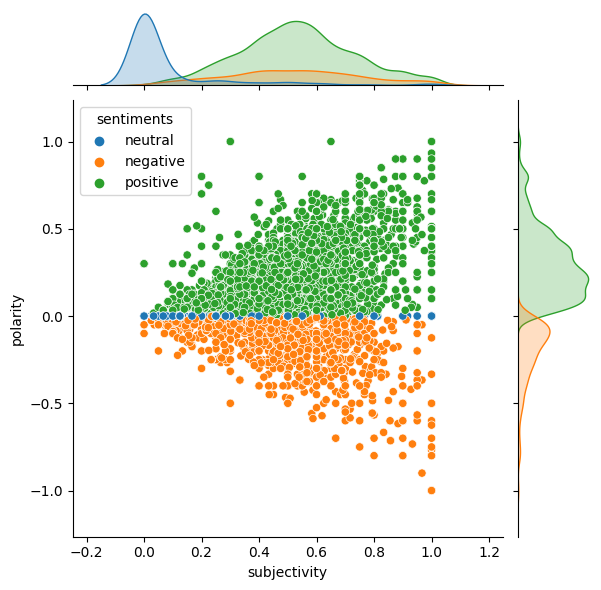

In [11]:
#Plot subjectivity vs emotion score

sns.jointplot(data=sentiments_dataframe, x="subjectivity", y="polarity",hue ="sentiments")

# Sentiments Count Plot

In [12]:
#Calculate the count of each emotions
senti_count = pd.DataFrame(sentiments_dataframe["sentiments"].value_counts())

#Rename 'emotion' to 'count'
senti_count = senti_count.rename({'sentiments': 'count'},axis = 1)

senti_count["sentiments"] = senti_count.index

print("---- Sentiments Count ----")
print(senti_count)

---- Sentiments Count ----
          count sentiments
positive   2915   positive
neutral    1155    neutral
negative    931   negative


In [47]:
import plotly.express as px

fig = px.bar(senti_count, x = 'sentiments', y = 'count',
             color = 'count')

fig.show() 

# Emotions Count Plot

In [13]:
#Calculate the count of each emotions
emotion_count = pd.DataFrame(sentiments_dataframe["emotion"].value_counts())

#Rename 'emotion' to 'count'
emotion_count = emotion_count.rename({'emotion': 'count'},axis = 1)

emotion_count["emotion"] = emotion_count.index

print("---- Emotion Count ----")
print(emotion_count)



---- Emotion Count ----
          count   emotion
positive   3049  positive
negative   1052  negative
neutral     900   neutral


In [14]:
import plotly.express as px

fig = px.bar(emotion_count, x = 'emotion', y = 'count',
             color = 'count', color_continuous_scale = 'viridis')

fig.show() 


## Sarcasm Count Plot

In [21]:
#Calculate the count of each sarcasm
sarcasm_count = pd.DataFrame(sentiments_dataframe["sarcasm"].value_counts())

#Rename 'sarcasm' to 'count'
sarcasm_count = sarcasm_count.rename({'sarcasm': 'count'},axis = 1)

sarcasm_count["sarcasm"] = sarcasm_count.index

print("---- Sarcasm Count ----")
print(sarcasm_count)


---- Sarcasm Count ----
       count sarcasm
False   4700   False
True     301    True


In [33]:
import plotly.express as px

fig = px.pie(values = [4700,301],
             names = ['unsarcastic tweets', 'sarcastic tweets'],
             color = ['G1', 'G2'],
             color_discrete_map = {'G1': '#8690FF', 
                                   'G2': '#F7C0BB'})


fig.show() 


# **Frequency Distribution and Word Cloud Plots**

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_freqDist_wordCloud(sentiments_data):
    #Create frequency distribution for "subset"
    frequency_dist = nltk.FreqDist()
    for i in sentiments_data["text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            frequency_dist[j] +=1
    large_words=dict([k,v]for k,v in frequency_dist.items() if len(k)>3)
    frequency_dist = nltk.FreqDist(large_words)
    frequency_dist.plot(30, cumulative=False)
    
    #Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black").generate_from_frequencies(frequency_dist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

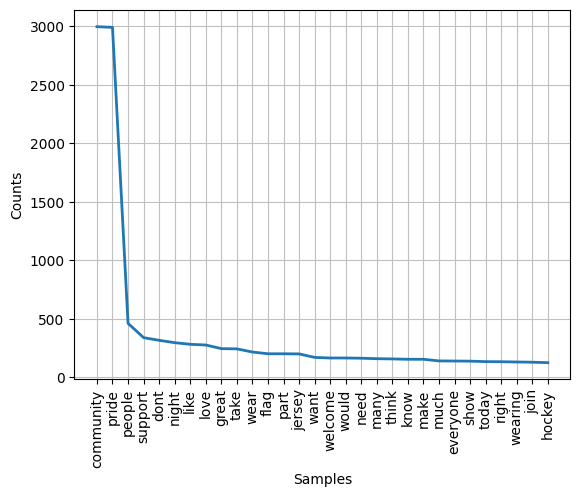

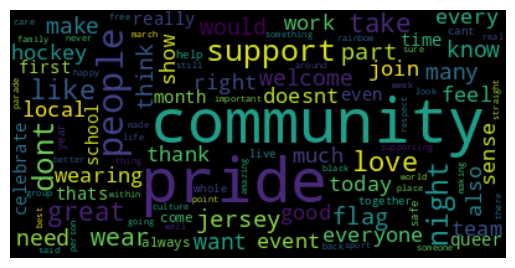

In [17]:
draw_freqDist_wordCloud(sentiments_dataframe[sentiments_dataframe["sentiments"] == "positive"])

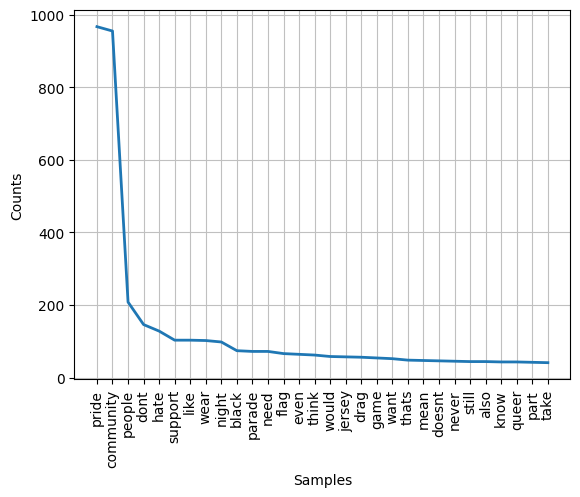

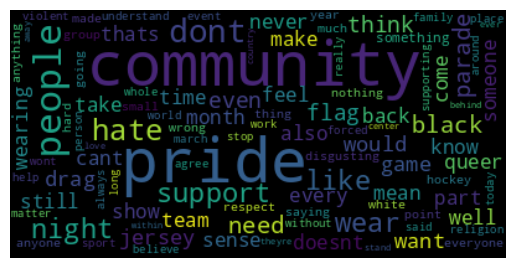

In [18]:
draw_freqDist_wordCloud(sentiments_dataframe[sentiments_dataframe["sentiments"] == "negative"])

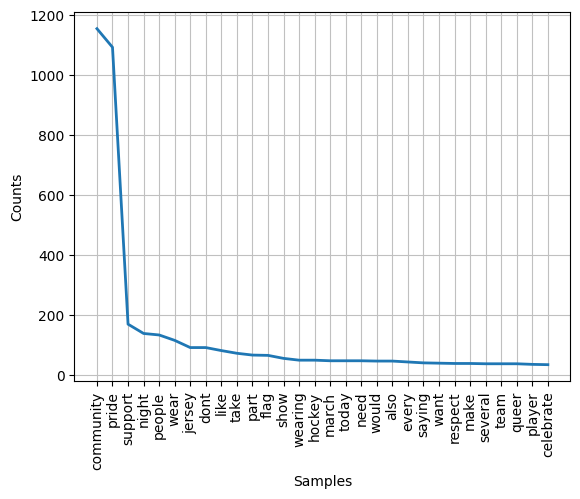

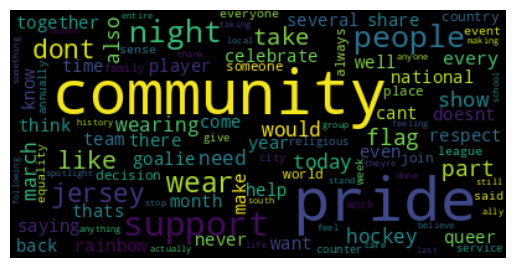

In [19]:
draw_freqDist_wordCloud(sentiments_dataframe[sentiments_dataframe["sentiments"] == "neutral"])

# **Machine Learning (Logistic Regression)**

In [20]:
def create_column_label(data):
    label = []
    for i in data['Text']:
        blob = TextBlob(i)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            label.append(1)
        else:
            label.append(0)
    data['label'] = label
    return data

#call the function
create_column_label(data)

,Datetime,Tweet Id,RawContent,Rendered Content,Text,Username,Hashtags,Source,Retweet Count,Reply Count,View Count,Like Count,Language,Media,UserLocation,SourceLabel,label
0,2023-03-25 23:59:22+00:00,1639779036569239553,@CaniacDaBackup Any details of the support you...,@CaniacDaBackup Any details of the support you...,support plan give community wear pride jersey ...,Jdmathison1,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,1,103.0,0,en,NaN,NaN,Twitter for iPhone,0
1,2023-03-25 23:57:37+00:00,1639778593705455618,It baffles the mind that people think that pri...,It baffles the mind that people think that pri...,mind people think pride possible without commu...,jntrnr,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,2259.0,17,en,NaN,NaN,Twitter Web App,0
2,2023-03-25 23:56:03+00:00,1639778200132648962,@JustMy_Comment2 @DrifterKybe @GeorgeTakei Nob...,@JustMy_Comment2 @DrifterKybe @GeorgeTakei Nob...,nobody saying pride response humiliation explo...,TrombonafideTA,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,13.0,0,en,NaN,NaN,Twitter for iPhone,0
3,2023-03-25 23:55:26+00:00,1639778045484736512,Pride of the community.,Pride of the community.,pride community,OmerHejazeen,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,12.0,0,en,NaN,NaN,Twitter for iPhone,0
4,2023-03-25 23:46:58+00:00,1639775913750720514,@Charles35093463 Exactly! Don’t vote for DeSan...,@Charles35093463 Exactly! Don’t vote for DeSan...,exactly dont vote racist pig anyone community ...,Momma822,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,27.0,1,en,NaN,NaN,Twitter for iPhone,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,2023-03-10 08:01:28+00:00,1634102154351788032,The purpose of the Auslan Day competition is t...,The purpose of the Auslan Day competition is t...,purpose day competition promote creativity ori...,deafaustralia,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",0,0,41.0,1,en,NaN,NaN,Buffer,0
4997,2023-03-10 08:00:49+00:00,1634101991172349953,Now that was a fun activation fun Solutions Gr...,Now that was a fun activation fun Solutions Gr...,fun activation fun group worked town pride out...,Bespoke_Styling,"['SolutionsGroupEvents', 'Pride2023', 'Capetown']","<a href=""https://www.loomly.com/"" rel=""nofollo...",0,0,20.0,0,en,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,Loomly,1
4998,2023-03-10 07:37:52+00:00,1634096217532637184,There is a sense of pride of cleaning a once f...,There is a sense of pride of cleaning a once f...,sense pride cleaning flourishing garden jewel ...,renegadestyle,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,176.0,1,en,NaN,NaN,Twitter for iPhone,1
4999,2023-03-10 07:35:11+00:00,1634095540014030848,#Portrait of a woman belonging to the #Mong mi...,#Portrait of a woman belonging to the #Mong mi...,portrait woman belonging mong minority mong kn...,HowWeTravelled,"['Portrait', 'Mong', 'Vietnam', 'travelphotogr...","<a href=""http://twitter.com/download/android"" ...",0,0,100.0,2,en,[Photo(previewUrl='https://pbs.twimg.com/media...,"Place(id='ea0a61fa0c646676', fullName='Rotterd...",Twitter for Android,1


Accuracy: 0.8382798304058147
Confusion Matrix:
 [[563 123]
 [144 821]]


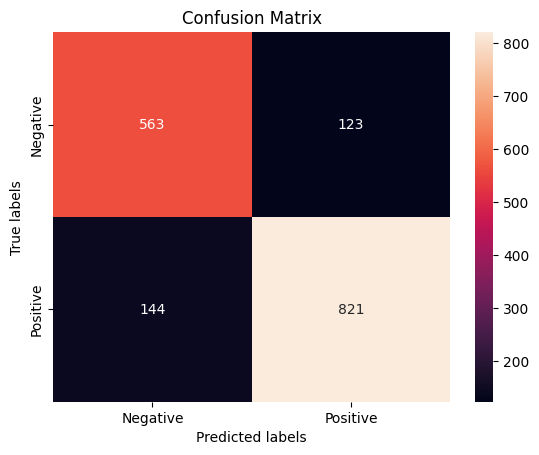

In [23]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a CountVectorizer object
vectorizer = CountVectorizer()

# Splitting data into training and testing sets
X = data['Text']
y = data['label']
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

# Creating and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the target variable
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='g')
# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


# **Deep Learning**

In [24]:
#Install and import the required libraries

!pip install keras
!pip install tensorflow
import tensorflow.keras
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
data=data[['Text','label']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5001 non-null   object
 1   label   5001 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [26]:
#Seperating positive and negative tweets
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [28]:
#combining positive and negative tweets
data = pd.concat([data_pos, data_neg])

In [29]:
#seperating input feature and label
X=data.Text
y=data.label

In [30]:
#Prepared for training the model

max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

sequences_matrix.shape 

(5001, 500)

In [31]:
#Data split into training set and testing set

X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [32]:
#TensorFlow model

def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer) 
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 
    

## Model with RMSprop Optimiser

In [33]:
#TensorFlow model is called with RMSprop optimizer

model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy']) 

In [34]:
#Training the model

history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
40/40 [==============================] - 35s 755ms/step - loss: 0.6783 - accuracy: 0.5771 - val_loss: 0.6589 - val_accuracy: 0.6286
Epoch 2/6
40/40 [==============================] - 27s 689ms/step - loss: 0.6319 - accuracy: 0.6419 - val_loss: 0.5897 - val_accuracy: 0.6971
Epoch 3/6
40/40 [==============================] - 20s 490ms/step - loss: 0.4982 - accuracy: 0.7600 - val_loss: 0.5098 - val_accuracy: 0.7514
Epoch 4/6
40/40 [==============================] - 20s 509ms/step - loss: 0.3372 - accuracy: 0.8641 - val_loss: 0.4127 - val_accuracy: 0.8029
Epoch 5/6
40/40 [==============================] - 20s 494ms/step - loss: 0.2429 - accuracy: 0.9076 - val_loss: 0.4071 - val_accuracy: 0.8114
Epoch 6/6
40/40 [==============================] - 20s 513ms/step - loss: 0.1831 - accuracy: 0.9340 - val_loss: 0.4136 - val_accuracy: 0.8314
Training finished !!


In [35]:
#Testing the trained model on test data

accr1 = model.evaluate(X_test,Y_test) 

47/47 [==============================] - 4s 76ms/step - loss: 0.4080 - accuracy: 0.8468


In [36]:
#Accuracy calculation

print('Accuracy of the Test data: {:0.2f}'.format(accr1[1]))

Accuracy of the Test data: 0.85


In [37]:
#prediction of test data

y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

47/47 [==============================] - 4s 77ms/step


## Plot Confusion Matrix for the Model with best accuracy



confusion matrix


[[472 136]
 [ 94 799]]




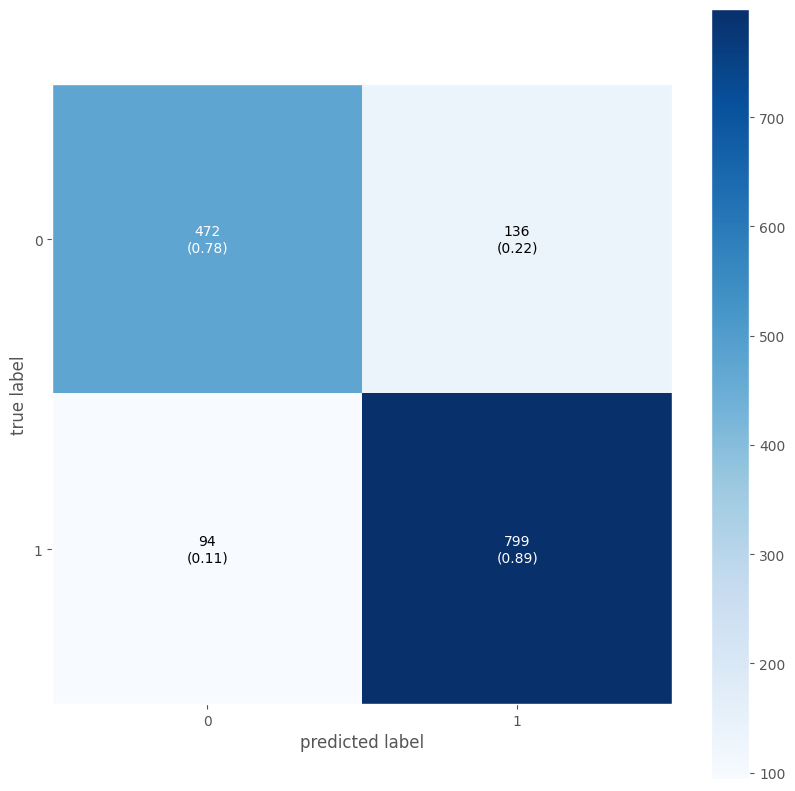

In [38]:
#confusion matrix

print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Model with Adadelta Optimiser

In [40]:
#TensorFlow Model is called with optimizer as Adadelta

from tensorflow.keras.optimizers import Adadelta

model_adadelta = tensorflow_based_model() 
model_adadelta.compile(loss='binary_crossentropy',optimizer=Adadelta(),metrics=['accuracy']) 

In [42]:
#Training the model

history=model_adadelta.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
40/40 [==============================] - 35s 811ms/step - loss: 0.6932 - accuracy: 0.4781 - val_loss: 0.6931 - val_accuracy: 0.4943
Epoch 2/6
40/40 [==============================] - 28s 707ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6930 - val_accuracy: 0.5114
Epoch 3/6
40/40 [==============================] - 30s 741ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6930 - val_accuracy: 0.5286
Epoch 4/6
40/40 [==============================] - 21s 514ms/step - loss: 0.6930 - accuracy: 0.5210 - val_loss: 0.6930 - val_accuracy: 0.5400
Epoch 5/6
40/40 [==============================] - 31s 772ms/step - loss: 0.6930 - accuracy: 0.5108 - val_loss: 0.6929 - val_accuracy: 0.5600
Epoch 6/6
40/40 [==============================] - 38s 954ms/step - loss: 0.6930 - accuracy: 0.5289 - val_loss: 0.6929 - val_accuracy: 0.5514
Training finished !!


In [43]:
#Testing the trained model on test data
accr1 = model_adadelta.evaluate(X_test,Y_test) 

47/47 [==============================] - 4s 76ms/step - loss: 0.6930 - accuracy: 0.5203


In [44]:
#Accuracy Calculation

print('Accuracy of the Test data: {:0.2f}'.format(accr1[1]))

Accuracy of the Test data: 0.52


In [45]:
#prediction of test data

y_pred = model_adadelta.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

47/47 [==============================] - 5s 83ms/step


## Model with SGD optimiser

In [46]:
#TensorFlow model called with SGD optimizer

from tensorflow.keras.optimizers import SGD

model_sgd = tensorflow_based_model() 
model_sgd.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy']) 

In [47]:
#Training the model

history=model_sgd.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
40/40 [==============================] - 25s 514ms/step - loss: 0.6913 - accuracy: 0.5749 - val_loss: 0.6897 - val_accuracy: 0.5743
Epoch 2/6
40/40 [==============================] - 21s 511ms/step - loss: 0.6880 - accuracy: 0.5781 - val_loss: 0.6868 - val_accuracy: 0.5743
Epoch 3/6
40/40 [==============================] - 20s 509ms/step - loss: 0.6852 - accuracy: 0.5781 - val_loss: 0.6849 - val_accuracy: 0.5743
Epoch 4/6
40/40 [==============================] - 21s 510ms/step - loss: 0.6835 - accuracy: 0.5781 - val_loss: 0.6836 - val_accuracy: 0.5743
Epoch 5/6
40/40 [==============================] - 23s 571ms/step - loss: 0.6827 - accuracy: 0.5781 - val_loss: 0.6828 - val_accuracy: 0.5743
Epoch 6/6
40/40 [==============================] - 20s 503ms/step - loss: 0.6815 - accuracy: 0.5781 - val_loss: 0.6823 - val_accuracy: 0.5743
Training finished !!


In [48]:
#Testing the trained model on test data

accr1 = model_sgd.evaluate(X_test,Y_test) 

47/47 [==============================] - 4s 84ms/step - loss: 0.6779 - accuracy: 0.5949


In [49]:
#Accuracy Calculation

print('Accuracy of the Test data: {:0.2f}'.format(accr1[1]))

Accuracy of the Test data: 0.59


In [50]:
#prediction of test data

y_pred = model_sgd.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

47/47 [==============================] - 8s 156ms/step
